## Lab 1

Holly Christenson

4/12/16

In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

The goal of this lab is to compute the radius that encloses half of the Earth's mass. We'll start by loading in some data.

In [33]:
file = 'PREM_1s.csv'
radius, density = np.loadtxt(file, delimiter=',', usecols=(0,2), comments='#', unpack=True)

The first important step is to make sure the units of our radius and density are compatible! Here, density is given in g/cm$^3$ and radius is in km. We'll change density to kg/m$^3$ and radius to meters.

In [34]:
radius = radius*1000
density = density*1000

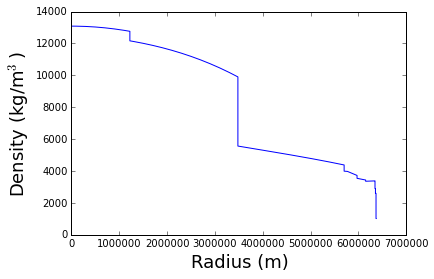

In [78]:
plt.figure()
plt.plot(radius,density)
plt.xlabel("Radius (m)",fontsize='18')
plt.ylabel("Density (kg/m$^3$)",fontsize='18')
plt.show()

The mass of a sphere is given by

$M = \frac{4}{3}\pi R^3 \times \rho$

and the mass of the Earth is

$M_{earth} = 5.972 \times 10^{24}$ kg

Density here is given in shells of radius, so the first step to making this calculation is to calculate an array of mass values for each radius $i$:

$ M_i = \frac{4}{3} \pi (R_{i+1}^3 - R_i^3) \times \rho_i $

In [51]:
m = np.zeros([radius.size])

for i in range(1,radius.size):
    m[i] = (4/3)*np.pi*(radius[i-1]**3 - radius[i]**3)*density[i]

m_earth= np.sum(m)
print(m_earth)

5.99164122092e+24


Cool, that's approximately the actual mass of the Earth. We now need to figure out the radius at which $\textit{half}$ of this mass is enclosed.

In [77]:
m_half = (1/2)*m_earth

m_enc = 0
count=0

while(m_enc < m_half or m_enc == m_half):
    m_enc = m_enc + m[count]
    count = count+1

radius[count]

4385700.0

According to my calculations, the radius for which half of the Earth's mass is enclosed is 4386 km.